# License 
***
Copyright (C) 2017 J. Patrick Hall, jphall@gwu.edu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

***
# Python: Part 0 - Pandas and Numpy

## 1. Standard output
`print` is the primary function used to write to the console in Python
* `print` is a *function* in Python 3
* `print` is a *statement* in Python 2 

In [4]:
print('Hello World!') # Python 3
print 'Hello World!'  # Python 2

Hello World!
Hello World!


In [5]:
# An object with no functions or operators is also printed to the console
x = 'Hello World!'
x

'Hello World!'

***
## 2. Importing libraries 

Python contains many libraries, often called *modules*, for different purposes

Modules are:
* Nearly always free and open source
* Installed using many different methods - a package manager like `conda`, readily available through the Anaconda release of Python (https://www.continuum.io/downloads) - is often a good solution for installing and managing packages/modules 
* Of relatively high and uniform quality and but licensing can vary
* Imported using the `import` statement

In [6]:
# import packages
import string                   # module with string utilities
import pandas as pd             # large module with many utilities for dataframes, here aliased as 'pd' 
import numpy as np              # large module with many numeric and mathematical utilities, here aliased as 'np'
import matplotlib.pyplot as plt # module for plotting

# "magic" syntax to display matplotlib graphics in a notebook
# magic statements start with '%' and are often used to control notebook behavior
%matplotlib inline             

***
## 3. Generating a sample data set
#### Set the number of rows and columns for the sample data set

In [7]:
n_rows = 1000
n_vars = 2

#### Create lists of strings that will become column names
* Lists are a common data structure in Python
* Lists are surrounded by square brackets [] and contain different data types as list elements
* Lists can be created by a speficic type Pythonic syntax, called list comprehensions
* Lists in Python are indexed from 0, unlike SAS or R
* Lists in Python, and other data structures, can be sliced using numeric indices

In [8]:
# list comprehension
# str() converts to string
# range() creates a list of values from arg1 to arg2
num_col_names = ['numeric' + str(i+1) for i in range(0, n_vars)]  
num_col_names

['numeric1', 'numeric2']

In [9]:
type(num_col_names) # type() can be used to determine the class of an object in Python

list

##### Python supports anonymous functions

In [10]:
# anonymous functions
# the lamba statement is used to define simple anonymous functions
# map() is very similar to to lapply() in R - it applies a function to the elements of a list
char_col_names = map(lambda j: 'char' + str(j+1), range(0, n_vars)) 
char_col_names

['char1', 'char2']

#### Create a list of text elements from which to sample

In [11]:
# string.ascii_uppercase is a string constant of uppercase letters
print(string.ascii_uppercase)

# another list comprehension
# slice first seven letters of the string
text_draw = [(letter * 8) for letter in string.ascii_uppercase[:7]] 
text_draw

ABCDEFGHIJKLMNOPQRSTUVWXYZ


['AAAAAAAA',
 'BBBBBBBB',
 'CCCCCCCC',
 'DDDDDDDD',
 'EEEEEEEE',
 'FFFFFFFF',
 'GGGGGGGG']

#### Create a random numerical columns directly using numpy
The numerical columns will originally be a 2-D numpy array

In [12]:
randoms = np.random.randn(n_rows, n_vars)
randoms[0:5]

array([[-1.846671  ,  1.84830227],
       [-0.70740383, -1.00412281],
       [-0.09483552, -0.25116307],
       [-0.12577991, -1.23737785],
       [ 0.38218289, -1.7115725 ]])

In [13]:
type(randoms)

numpy.ndarray

#### Create numerical columns of Pandas dataframe from numpy array
Notice that a key is generated automatically 

In [14]:
num_cols = pd.DataFrame(randoms, columns=num_col_names)
num_cols.head()

,numeric1,numeric2
0,-1.846671,1.848302
1,-0.707404,-1.004123
2,-0.094836,-0.251163
3,-0.125780,-1.237378
4,0.382183,-1.711572


In [15]:
type(num_cols)

pandas.core.frame.DataFrame

#### Create random character columns as a Pandas dataframe
* Use a numpy sampling function `choice()` to generate a 2-D numpy array of random text values
* Create Pandas dataframe from numpy 2-D array

In [16]:
char_cols = pd.DataFrame(np.random.choice(text_draw, (n_rows, n_vars)), 
                         columns=char_col_names)
char_cols.head()

,char1,char2
0,EEEEEEEE,AAAAAAAA
1,DDDDDDDD,DDDDDDDD
2,AAAAAAAA,DDDDDDDD
3,DDDDDDDD,FFFFFFFF
4,CCCCCCCC,FFFFFFFF


#### Use Pandas `concat()` function to join the numeric and character columns into a new dataframe

In [17]:
scratch_df = pd.concat([num_cols, char_cols], axis=1)
scratch_df.head()

,numeric1,numeric2,char1,char2
0,-1.846671,1.848302,EEEEEEEE,AAAAAAAA
1,-0.707404,-1.004123,DDDDDDDD,DDDDDDDD
2,-0.094836,-0.251163,AAAAAAAA,DDDDDDDD
3,-0.125780,-1.237378,DDDDDDDD,FFFFFFFF
4,0.382183,-1.711572,CCCCCCCC,FFFFFFFF


***
## 4. Plotting variables in a dataframe
Pandas has several builtin plotting utilities
#### Use Pandas `hist()` method to plot a histogram of numeric1

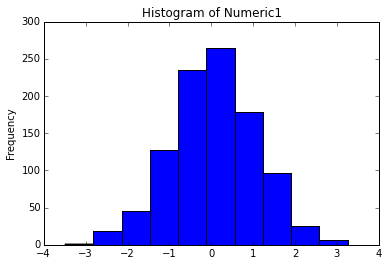

In [18]:
# Pandas alllows slicing by dataframes index using ix[]
# ix[:, 0] means all rows of the 0th column - or numeric1
scratch_df.ix[:, 0].plot.hist(title='Histogram of Numeric1')

#### use Pandas `scatter()` method to plot numeric1 vs. numeric2

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


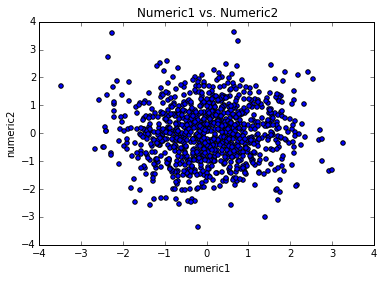

In [19]:
scratch_df.plot.scatter(x='numeric1', y='numeric2',
                        title='Numeric1 vs. Numeric2')

***
## 5. Subsetting Pandas dataframes
### By columns
#### Subsetting by index

In [20]:
# one column returns a Pandas series
# a Pandas series is like a single column vector
scratch_df.iloc[:, 0].head()

0   -1.846671
1   -0.707404
2   -0.094836
3   -0.125780
4    0.382183
Name: numeric1, dtype: float64

In [21]:
type(scratch_df.iloc[:, 0])

pandas.core.series.Series

In [22]:
# more than one columns makes a dataframe
# iloc enables location by index
scratch_df.iloc[:, 0:2].head()

,numeric1,numeric2
0,-1.846671,1.848302
1,-0.707404,-1.004123
2,-0.094836,-0.251163
3,-0.125780,-1.237378
4,0.382183,-1.711572


In [23]:
type(scratch_df.iloc[:, 0:2])

pandas.core.frame.DataFrame

#### Subsetting by variable name

In [24]:
scratch_df['numeric1'].head()

0   -1.846671
1   -0.707404
2   -0.094836
3   -0.125780
4    0.382183
Name: numeric1, dtype: float64

In [25]:
scratch_df.numeric1.head()

0   -1.846671
1   -0.707404
2   -0.094836
3   -0.125780
4    0.382183
Name: numeric1, dtype: float64

In [26]:
# loc[] allows for location by column or row label 
scratch_df.loc[:, 'numeric1'].head()

0   -1.846671
1   -0.707404
2   -0.094836
3   -0.125780
4    0.382183
Name: numeric1, dtype: float64

In [27]:
# loc can accept lists as an input
scratch_df.loc[:, ['numeric1', 'numeric2']].head()

,numeric1,numeric2
0,-1.846671,1.848302
1,-0.707404,-1.004123
2,-0.094836,-0.251163
3,-0.125780,-1.237378
4,0.382183,-1.711572


### By rows
#### Subsetting by index

In [28]:
scratch_df[0:3]

,numeric1,numeric2,char1,char2
0,-1.846671,1.848302,EEEEEEEE,AAAAAAAA
1,-0.707404,-1.004123,DDDDDDDD,DDDDDDDD
2,-0.094836,-0.251163,AAAAAAAA,DDDDDDDD


In [29]:
# Selecting by index 
scratch_df.iloc[0:5, :] 

,numeric1,numeric2,char1,char2
0,-1.846671,1.848302,EEEEEEEE,AAAAAAAA
1,-0.707404,-1.004123,DDDDDDDD,DDDDDDDD
2,-0.094836,-0.251163,AAAAAAAA,DDDDDDDD
3,-0.125780,-1.237378,DDDDDDDD,FFFFFFFF
4,0.382183,-1.711572,CCCCCCCC,FFFFFFFF


In [30]:
# select by row label
# here index/key values 0:5 are returned
scratch_df.loc[0:5, :]

,numeric1,numeric2,char1,char2
0,-1.846671,1.848302,EEEEEEEE,AAAAAAAA
1,-0.707404,-1.004123,DDDDDDDD,DDDDDDDD
2,-0.094836,-0.251163,AAAAAAAA,DDDDDDDD
3,-0.125780,-1.237378,DDDDDDDD,FFFFFFFF
4,0.382183,-1.711572,CCCCCCCC,FFFFFFFF
5,-0.661172,-0.124998,FFFFFFFF,GGGGGGGG


#### Boolean subsetting

In [31]:
scratch_df[scratch_df.numeric2 > 0].head()

,numeric1,numeric2,char1,char2
0,-1.846671,1.848302,EEEEEEEE,AAAAAAAA
7,-0.135225,0.982267,CCCCCCCC,EEEEEEEE
9,0.534110,0.430327,AAAAAAAA,FFFFFFFF
11,-0.957339,0.435087,EEEEEEEE,BBBBBBBB
12,0.390665,0.408823,GGGGGGGG,FFFFFFFF


In [32]:
scratch_df[scratch_df.char1 == 'AAAAAAAA'].head()

,numeric1,numeric2,char1,char2
2,-0.094836,-0.251163,AAAAAAAA,DDDDDDDD
8,0.565589,-1.405314,AAAAAAAA,EEEEEEEE
9,0.534110,0.430327,AAAAAAAA,FFFFFFFF
21,-0.121501,-0.906697,AAAAAAAA,GGGGGGGG
26,2.096871,1.511935,AAAAAAAA,CCCCCCCC


In [33]:
scratch_df[scratch_df.char1.isin(['AAAAAAAA', 'BBBBBBBB'])].head()

,numeric1,numeric2,char1,char2
2,-0.094836,-0.251163,AAAAAAAA,DDDDDDDD
8,0.565589,-1.405314,AAAAAAAA,EEEEEEEE
9,0.534110,0.430327,AAAAAAAA,FFFFFFFF
13,-0.679535,-1.710162,BBBBBBBB,EEEEEEEE
21,-0.121501,-0.906697,AAAAAAAA,GGGGGGGG


In [34]:
scratch_df[scratch_df.numeric2 > 0].loc[5:10, 'char2']

7    EEEEEEEE
9    FFFFFFFF
Name: char2, dtype: object

***
## 6. Updating the dataframe

In [35]:
# must use .copy() or this will be a symbolic link
scratch_df2 = scratch_df.copy()

# Pandas supports in place overwrites of data
# overwrite last 500 rows of char1 with ZZZZZZZZ
scratch_df2.loc[500:, 'char1'] = 'ZZZZZZZZ'
scratch_df2.tail()

,numeric1,numeric2,char1,char2
995,2.537433,1.944461,ZZZZZZZZ,DDDDDDDD
996,1.550140,-0.074913,ZZZZZZZZ,FFFFFFFF
997,2.759164,-0.211622,ZZZZZZZZ,CCCCCCCC
998,2.095885,-0.700426,ZZZZZZZZ,BBBBBBBB
999,1.866174,0.539002,ZZZZZZZZ,AAAAAAAA


In [36]:
# iat[] allows for fast location of specific indices
scratch_df2.iat[0, 0] = 1000
scratch_df2.head()

,numeric1,numeric2,char1,char2
0,1000.000000,1.848302,EEEEEEEE,AAAAAAAA
1,-0.707404,-1.004123,DDDDDDDD,DDDDDDDD
2,-0.094836,-0.251163,AAAAAAAA,DDDDDDDD
3,-0.125780,-1.237378,DDDDDDDD,FFFFFFFF
4,0.382183,-1.711572,CCCCCCCC,FFFFFFFF


***
## 7. Sorting the dataframe
#### Sort by values of one variable

In [37]:
scratch_df2.sort_values(by='char1').head()

,numeric1,numeric2,char1,char2
499,0.199489,-1.008574,AAAAAAAA,DDDDDDDD
225,0.531949,-1.267235,AAAAAAAA,DDDDDDDD
347,-0.643377,-0.165108,AAAAAAAA,AAAAAAAA
103,0.666005,0.631195,AAAAAAAA,BBBBBBBB
102,-0.924382,1.784032,AAAAAAAA,CCCCCCCC


#### Sort by values of multiple variables and specify sort order

In [38]:
scratch_df3 = scratch_df2.sort_values(by=['char1', 'numeric1'],
                            ascending=[False, True]).copy()
scratch_df3.head()

,numeric1,numeric2,char1,char2
533,-3.490143,1.699398,ZZZZZZZZ,EEEEEEEE
605,-2.669272,-0.577942,ZZZZZZZZ,GGGGGGGG
759,-2.455348,-0.499223,ZZZZZZZZ,GGGGGGGG
630,-2.426346,0.238347,ZZZZZZZZ,EEEEEEEE
884,-2.409502,0.063437,ZZZZZZZZ,BBBBBBBB


#### Sort by the value of the dataframe index

In [39]:
scratch_df2.sort_index().head()

,numeric1,numeric2,char1,char2
0,1000.000000,1.848302,EEEEEEEE,AAAAAAAA
1,-0.707404,-1.004123,DDDDDDDD,DDDDDDDD
2,-0.094836,-0.251163,AAAAAAAA,DDDDDDDD
3,-0.125780,-1.237378,DDDDDDDD,FFFFFFFF
4,0.382183,-1.711572,CCCCCCCC,FFFFFFFF


***
## 8. Adding data to the dataframe
* Pandas `concat()` supports numerous types of joins and merges
* Pandas `merge()` supports joins and merges using more SQL-like syntax 
  * i.e. `merge(left, right, on=)`
* Pandas `append()` supports stacking dataframes top-to-bottom

In [40]:
# create a toy dataframe to join/merge onto scratch_df
scratch_df3 = scratch_df3.drop(['numeric1', 'numeric2'] , axis=1)
scratch_df3.columns = ['char3', 'char4']
scratch_df3.tail()

,char3,char4
286,AAAAAAAA,AAAAAAAA
172,AAAAAAAA,AAAAAAAA
26,AAAAAAAA,CCCCCCCC
228,AAAAAAAA,GGGGGGGG
117,AAAAAAAA,GGGGGGGG


In [41]:
# default outer join on matching indices
# this will create 2000 row × 6 column dataset because indices are not in identical order
scratch_df4 = pd.concat([scratch_df, scratch_df3])
scratch_df4

,char1,char2,char3,char4,numeric1,numeric2
0,EEEEEEEE,AAAAAAAA,NaN,NaN,-1.846671,1.848302
1,DDDDDDDD,DDDDDDDD,NaN,NaN,-0.707404,-1.004123
2,AAAAAAAA,DDDDDDDD,NaN,NaN,-0.094836,-0.251163
3,DDDDDDDD,FFFFFFFF,NaN,NaN,-0.125780,-1.237378
4,CCCCCCCC,FFFFFFFF,NaN,NaN,0.382183,-1.711572
5,FFFFFFFF,GGGGGGGG,NaN,NaN,-0.661172,-0.124998
6,GGGGGGGG,GGGGGGGG,NaN,NaN,0.828998,-0.967002
7,CCCCCCCC,EEEEEEEE,NaN,NaN,-0.135225,0.982267
8,AAAAAAAA,EEEEEEEE,NaN,NaN,0.565589,-1.405314
9,AAAAAAAA,FFFFFFFF,NaN,NaN,0.534110,0.430327


In [42]:
# outer join on matching columns
# axis=1 specificies to join on matching columns
scratch_df5 = pd.concat([scratch_df, scratch_df3], axis=1)
scratch_df5.head()

,numeric1,numeric2,char1,char2,char3,char4
0,-1.846671,1.848302,EEEEEEEE,AAAAAAAA,EEEEEEEE,AAAAAAAA
1,-0.707404,-1.004123,DDDDDDDD,DDDDDDDD,DDDDDDDD,DDDDDDDD
2,-0.094836,-0.251163,AAAAAAAA,DDDDDDDD,AAAAAAAA,DDDDDDDD
3,-0.125780,-1.237378,DDDDDDDD,FFFFFFFF,DDDDDDDD,FFFFFFFF
4,0.382183,-1.711572,CCCCCCCC,FFFFFFFF,CCCCCCCC,FFFFFFFF


In [43]:
scratch_df5.shape

(1000, 6)

In [44]:
# append
scratch_df6 = scratch_df.append(scratch_df)
scratch_df6.shape

(2000, 4)

***
## 9. Comparing dataframes
* Use Pandas `equals()` to compare dataframes
* Row order is not ignored

In [45]:
scratch_df.equals(scratch_df)

True

In [46]:
scratch_df.equals(scratch_df.sort_values(by='char1'))

False

In [47]:
scratch_df.equals(scratch_df2)

False

***
## 10. Summarizing dataframes
Pandas offers several straightforward summarization functions

In [48]:
scratch_df.mean()

numeric1    0.067432
numeric2   -0.002979
dtype: float64

In [49]:
scratch_df.mode()

,numeric1,numeric2,char1,char2
0,NaN,NaN,DDDDDDDD,BBBBBBBB


In [50]:
scratch_df.describe()

,numeric1,numeric2
count,1000.000000,1000.000000
mean,0.067432,-0.002979
std,1.014362,1.008141
min,-3.490143,-3.344991
25%,-0.610958,-0.692698
50%,0.050545,0.002861
75%,0.718816,0.676773
max,3.259914,3.623428


***
## 11. By group processing
Use Pandas `groupby()` to create groups for subsequent processing

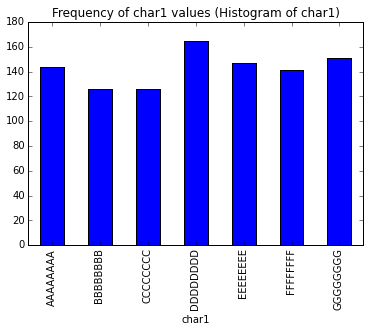

In [51]:
# use summary function size() on groups created by groupby()
counts = scratch_df.groupby('char1').size()
plt.figure()
counts.plot.bar(title='Frequency of char1 values (Histogram of char1)')

In [52]:
# groupby the values of more than one variable
group_means = scratch_df.groupby(['char1', 'char2']).mean()
group_means

numeric1  numeric2
char1    char2                       
AAAAAAAA AAAAAAAA  0.287226  0.139453
         BBBBBBBB -0.116169  0.065721
         CCCCCCCC -0.027425  0.133440
         DDDDDDDD  0.197693 -0.190331
         EEEEEEEE  0.063590  0.329729
         FFFFFFFF -0.175555 -0.329659
         GGGGGGGG  0.189824  0.147558
BBBBBBBB AAAAAAAA -0.086814  0.221350
         BBBBBBBB  0.188284 -0.389512
         CCCCCCCC  0.069539 -0.126538
         DDDDDDDD  0.314592 -0.064758
         EEEEEEEE  0.269574 -0.129884
         FFFFFFFF -0.205605 -0.028343
         GGGGGGGG  0.365227 -0.053123
CCCCCCCC AAAAAAAA  0.028210 -0.295764
         BBBBBBBB  0.074422 -0.017167
         CCCCCCCC  0.243360  0.073591
         DDDDDDDD  0.250268 -0.491992
         EEEEEEEE -0.085427 -0.369362
         FFFFFFFF  0.175509  0.043392
         GGGGGGGG -0.017040 -0.272344
DDDDDDDD AAAAAAAA  0.202584 -0.024968
         BBBBBBBB  0.089411  0.240417
         CCCCCCCC  0.410671  0.360820
         DDDDDDDD  0.350856 -0.309482
         EEEEEEEE  0.109395  0.058292
         FFFFFFFF  0.078943 -0.383857
         GGGGGGGG -0.013982  0.018074
EEEEEEEE AAAAAAAA -0.369364 -0.409199
         BBBBBBBB -0.099274  0.193680
         CCCCCCCC  0.035146  0.146343
         DDDDDDDD -0.268458  0.223898
         EEEEEEEE  0.079099  0.065767
         FFFFFFFF  0.253714 -0.161576
         GGGGGGGG -0.270056  0.107336
FFFFFFFF AAAAAAAA  0.029830  0.038701
         BBBBBBBB  0.217070 -0.012318
         CCCCCCCC  0.205450 -0.087807
         DDDDDDDD  0.264409 -0.141813
         EEEEEEEE  0.042105  0.272400
         FFFFFFFF  0.146905  0.100713
         GGGGGGGG -0.316132  0.396029
GGGGGGGG AAAAAAAA  0.160410  0.226501
         BBBBBBBB  0.058595  0.171269
         CCCCCCCC  0.027790  0.132749
         DDDDDDDD  0.006063  0.317409
         EEEEEEEE -0.286541 -0.345819
         FFFFFFFF -0.053367 -0.024303
         GGGGGGGG  0.223895  0.133305

***
## 12. Transposing a table
* Transposing a matrix simply switches row and columns values
* Transposing a data.frame or dplyr table is more complex because of metadata associated with variable names and row indices

In [53]:
# Pandas .T performs a transpose
scratch_df.T.iloc[:, 0:5]

,0,1,2,3,4
numeric1,-1.84667,-0.707404,-0.0948355,-0.12578,0.382183
numeric2,1.8483,-1.00412,-0.251163,-1.23738,-1.71157
char1,EEEEEEEE,DDDDDDDD,AAAAAAAA,DDDDDDDD,CCCCCCCC
char2,AAAAAAAA,DDDDDDDD,DDDDDDDD,FFFFFFFF,FFFFFFFF


Often, instead of simply transposing, a data set will need to be reformatted in a **melt/stack** - **column split** - **cast** action described in Hadley Wickham's *Tidy Data*:
https://www.jstatsoft.org/article/view/v059i10

See the `stack` and `unstack` methods for Pandas dataframes

## Exporting and importing a dataframe
* Many `to_*` methods available for exporting dataframes to other formats
* Many `read_*` methods available for creating dataframes from other formats

In [54]:
# export to csv
scratch_df.to_csv('scratch.csv')

In [55]:
# import from csv 
scratch_df7 = pd.read_csv('scratch.csv')